In [3]:
# Autor: Daniel Pinto
# Arboles Binarios
# Fecha: 2021/10/01 YYYY/MM/DD
from typing import List, TypeVar, Tuple, Any, Callable, Optional, Generic, Dict
from hypothesis import given, strategies as st
from IPython.display import Markdown, display
from itertools import accumulate
from functools import reduce
from dataclasses import dataclass
from __future__ import annotations 
from copy import deepcopy
from collections.abc import  Iterable
import graphviz

def display_(s : str) -> None:
    '''
    A way to display strings with markdown 
    in jupyter.
    '''
    display(
        Markdown(s)
    )


SUCCESS_COLOR = '#4BB543'
ERROR_COLOR   = '#B00020'

def color_text(s : str, color : str =SUCCESS_COLOR ) -> str:
    return f"<span style='color:{color}'> {s} </span>."


a      = TypeVar('a')
b      = TypeVar('b')
c      = TypeVar('c')
T      = TypeVar('T')

In [4]:
# naive BST
@dataclass
class TreeNode(Generic[a]):
    val : a
    l   : Optional[TreeNode[a]] = None
    r   : Optional[TreeNode[a]] = None

@dataclass
class BinTree(Generic[T]):
    tree : Optional[TreeNode[T]] = None

    def insert(self, x : T):
        current : Optional[TreeNode[T]] = self.tree
        if current is None:
            self.tree = TreeNode(x)
            return
        next_n : Optional[TreeNode[T]] = current
        while(next_n is not None):
            current = next_n 
            if x <= current.val:
                next_n = current.l
            else:
                next_n = current.r
                
        if x <= current.val:
            current.l = TreeNode(x)
        else:
            current.r = TreeNode(x)

    
    def inorder(self) -> List[T]:
        res : List[T] = []
        self._inorder(res)
        return res

    def _inorder(self,res : List[T] = []):
        current : Optional[TreeNode[T]] = self.tree
        if current is None:
            return 
        wrapper_l : BinTree[T] = BinTree()
        wrapper_l.tree = current.l
        wrapper_l._inorder(res)
        res.append(current.val)
        wrapper_r : BinTree[T] = BinTree()
        wrapper_r.tree = current.r
        wrapper_r._inorder(res)

        return 
    
    def len(self) -> int:
        if self.tree is None:
            return 0
        wrapper_l : BinTree[T] = BinTree()
        wrapper_l.tree = self.tree.l
        wrapper_r : BinTree[T] = BinTree()
        wrapper_r.tree = self.tree.r

        return 1 + wrapper_l.len() + wrapper_r.len()

    def depth(self) -> int:
        if self.tree is None:
            return 0
        l : BinTree[T] = BinTree()
        l.tree = self.tree.l
        r : BinTree[T] = BinTree()
        r.tree = self.tree.r
        return 1 + max(l.depth(), r.depth())
    
    def level_order(self) -> List[List[Optional[T]]]:
        # Actual nodo a explorar
        current : Optional[Optional[TreeNode[T]]]       = self.tree
        # Respuesta, lista de nodos en level order traversal
        res     : List[List[Optional[T]]]               = []
        # Nodos que faltan por explorar
        nodes   : List[Optional[TreeNode[T]]]           = []
        # Proximos nodos a explorar
        next_n  : List[Optional[TreeNode[T]]]           = []

        if current is None:
            return []

        res.append([current.val])
        nodes = [current.l,current.r]

        # Mientras aun hayan nodos por explorar
        while(nodes != []):
            # Inicializa una lista con los elementos del nivel
            current_level : List[Optional[T]] = []
            # Y para cada nodo en los nodos por explorar
            for node in nodes:
                # chequea si es node, si es asi lo metemos
                if node is None:
                    current_level.append(None)
                    continue
                # si no es asi, metemos el valor, y expandimos los nodos pendientes
                # a sus hijos
                current_level.append(node.val)
                next_n.append(node.l)
                next_n.append(node.r)
            # los nodos por explorar seran los proximos
            nodes  = next_n
            next_n = []
            res.append(current_level)
        
        return res[:-1]

    def toPic(self, showLeaf : bool = True) -> Digraph:
        dot : Digraph = graphviz.Digraph(comment='The Round Table')
        current : Optional[TreeNode[T]] = self.tree
        if current is None:
            return dot
        nodes   : List[Optional[Tuple[TreeNode[T],str]]]  = []
        next_n  : List[Optional[Tuple[TreeNode[T],str]]]  = []
        nodes.append((current,'c'))
        dot.node('c',str(current.val))
        while (nodes != []):
            next_n = []
            for mn in nodes:
                if mn is None:
                    continue
                (node,name) = mn
                if node.l is not None:
                    l_name = name+'l'
                    next_n.append((node.l,l_name))
                    dot.node(l_name,str(node.l.val))
                    dot.edge(name,l_name)
                elif showLeaf:
                    l_name = name+'l'
                    dot.node(l_name,"Leaf")
                    dot.edge(name,l_name)
                if node.r is not None:
                    r_name = name+'r'
                    next_n.append((node.r,r_name))
                    dot.node(r_name,str(node.r.val))
                    dot.edge(name,r_name)
                elif showLeaf:
                    r_name = name+'r'
                    dot.node(r_name,"Leaf")
                    dot.edge(name,r_name)
            nodes  = next_n
            
        
        #dot.render('tround-table.gv', view=True) 
        return dot
    
    def succ(self,x : T) -> Optional[T]:
        return x

tree : BinTree[int] = BinTree()

tree.insert(5)
tree.insert(10)
tree.insert(1)
tree.insert(0)
tree.insert(-1)
tree.insert(4)
tree.insert(6)
tree.insert(11)
tree.insert(7)
tree.insert(2)
tree.insert(8)
tree.insert(20)
tree.insert(-3)
tree.insert(15)
# skewed tree
#for i in range(5):
#    tree.insert(i)


res : List[int] = []



tree.toPic()




ExecutableNotFound: failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH

# Exercise: Kth Ancestor of a Tree Node

Given a Tree `tree`, a value `val` and an integer `k`, find the `k-th` antecessor of `val` in `tree`

<center>

![Example tree](./img/kth_antecessor.png)

</center>

In the tree above, the `k=2` antecessor of 5 is 0, while the `k=1` antecessor of 3 is 1.


In [35]:
def kth(tree : BinTree[a], k : int, target : a) -> Optional[a]:
    slow : Optional[TreeNode[a]] = tree.tree
    fast : Optional[TreeNode[a]] = tree.tree
    if (slow is None) or (fast is None):
        return None
    while(k > 0):
        if target is None:
            break

        if target > fast.val:
            fast = fast.r
        elif target <= fast.val:
            fast = fast.l
        k = k -1
    if k != 0:
        return None
    
    while(True):
        
        if fast is None:
            return None

        if fast.val == target:
            return slow.val
        
        if target > fast.val:
            fast = fast.r
        elif target <= fast.val:
            fast = fast.l
        
        if target > slow.val:
            slow = slow.r
        elif target <= slow.val:
            slow = slow.l


print(kth(tree, 5, 16))





None


# Number of Nodes in the Sub-Tree With the Same Value

Given a Tree, return an array of pairs `(node,int)`  where `int` is the number of times the val in `node` is repeated in its subtree:

<center>

![example](./img/repeated.jpg)

</center>

In the above example, the expected answer would be: `[(0,2),(1,1),(2,1),(3,1),(4,1),(5,1),(6,1)]`


In [49]:
#sol
# level order
# preorder
# post order
# vertical order 
# que era inorder traversal?
# bfs = Level order

def combineDict(dict1 : Dict[a,int],dict2 : Dict[a,int]):
    for key in dict2:
        val = dict2[key]
        try:
            dict1[key] += val
        except:
            dict1[key] = val


def numbers_nodes(tree : BinTree[Tuple[int,a]]) -> List[Tuples[int,int]]:


    # d was not necessary, ya que estamos retornando el nuevo dict en la tupla.
    def _numbers_nodes(tree : BinTree[Tuple[int,a]]) -> Tuple[List[Tuples[int,int]], Dict[a,int]]:
        if tree.tree is None:
            return ([],{})
        if tree.tree.l is None and tree.tree.r is None:
            return ([(tree.tree.val[0],1)],{tree.tree.val[1]: 1} )
        

        left_tree : BinTree[Tuple[int,a]] = BinTree()
        left_tree.tree = tree.tree.l

        right_tree : BinTree[Tuple[int,a]] = BinTree()
        right_tree.tree = tree.tree.r # estaba con l.

        # mem_l = 'd':1, 'c':1, 'b':1
        # mem_r = 'a':1, 'e':1, 'd':1
        (res_l,mem_l) = _numbers_nodes(left_tree )
        (res_r,mem_r) = _numbers_nodes(right_tree )

        res : List[Tuples[int,int]] = res_l + res_r
        combineDict(mem_l, mem_r)
        key = tree.tree.val[1]
        combineDict(mem_l, {tree.tree.val[1]:1}) 
        
        res.append((tree.tree.val[0],mem_l[key])) # ya no es necesario sumar 1 porque cobinamos el dicc
        return  (res,mem_l)



    (res,_) = _numbers_nodes(tree)
    return res 


tree : BinTree[Tuple[int,str]] = BinTree()
n_0 = TreeNode((0,"a"))
n_1 = TreeNode((1,"b"))
n_2 = TreeNode((2,"a"))
n_3 = TreeNode((3,"e"))
n_4 = TreeNode((4,"d"))
n_5 = TreeNode((5,"c"))
n_6 = TreeNode((6,"d"))

n_0.l = n_1
n_0.r = n_2
n_1.l = n_4
n_1.r = n_5 
n_2.l = n_3
n_2.r = n_6

tree.tree = n_0

tree.toPic()

xs = numbers_nodes(tree)
xs.sort()
xs


#[(0,2),(1,1),(2,1),(3,1),(4,1),(5,1),(6,1)]

[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)]

# Validate Binary Tree Nodes

You have `n` binary tree nodes numbered from `0` to `n - 1` where node `i` has two children `leftChild[i]` and `rightChild[i]`, return true if and only if all the given nodes form exactly one valid binary tree.

If node `i` has no left child then `leftChild[i]` will equal `-1`, similarly for the right child.

Note that the nodes have no values and that we only use the node numbers in this problem.


<center>

![bad](./Images/bad.png)

</center>

Resultado:

```
Input: n = 4, leftChild = [1,-1,3,-1], rightChild = [2,3,-1,-1]
Output: false
```


<center>

![bad](./Images/bad2.png)

</center>

```
Input: n = 2, leftChild = [1,0], rightChild = [-1,-1]
Output: false
```

<center>

![bad](./Images/bad3.png)

</center>

```
Input: n = 6, leftChild = [1,-1,-1,4,-1,-1], rightChild = [2,-1,-1,5,-1,-1]
Output: false
```

In [ ]:
# sol

# Exercise: Reconstruct BST from Pre-order

Given a tree as a list of nodes visited in a pre order traversal, reconstruct the BST.

Example:



```
input: [5,1,0,-1,4,2,10,6,7,11]
output:
```

<center>

![''](./Images/toBST.jpg)

</center>



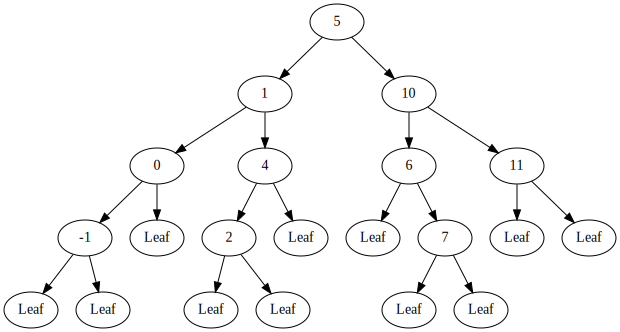

In [45]:

# [1,0,-1,4,2,10,6,7,11]
#  l@(Node: val: 1, l=None,None) : (Node: val=5,l=l,r=None) : []

#  11
#  11 : []

def build(l : List[int]) -> BinTree[int]:
    tree  : BinTree[int] = BinTree()
    stack : List[TreeNode[int]] = []
    root  : TreeNode[int] = TreeNode(val=l[0],l=None,r=None)
    stack.insert(0,root)
    for elem in l[1:]:
        node = TreeNode(val=elem,l=None,r=None)
        if elem <= stack[0].val:
            stack[0].l = node
            stack.insert(0,node)
        else:
            while(True):
                try:
                    stack[1]
                except:
                    stack[0].r = node
                    stack[0]   = node
                    break

                if  elem <= stack[1].val:
                    stack[0].r = node
                    stack[0]   = node
                    break
                else:
                    stack.pop(0)

    tree.tree = root
    return tree

l = [5,1,0,-1,4,2,10,6,7,11]
tree_ = build(l)
tree_.toPic()




# Exrcise: All Nodes Distance K in Binary Tree

Given a binary tree, the value of a target node `target`, and an integer `k`, return an array of the values of all nodes that have a distance `k` from the `target` node.

You can return the answer in **any order**.


<center>

![''](./Images/distance.png)

</center>

For the tree above, the output should be: `[7,4,1]` because the nodes that are a distance 2 from the target node (with value 5) have values 7, 4, and 1.

In [ ]:
#sol
# cheating: graph problem (bfs)
# sol: construct two trees: the subtree rooted at k, and the subtree of the antecessors of k.

# Exercise: Balanced Binary Tree

Given a binary tree, determine if it is height-balanced.

For this problem, a height-balanced binary tree is defined as:

_"a binary tree in which the left and right subtrees of every node differ in height by no more than 1."_



In [ ]:
#sol

# Exercise: Diameter of Binary Tree

Given a binary tree, return the length of the diameter of the tree.

The diameter of a binary tree is the length of the longest path between any two nodes in a tree. This path **may or may not pass through the root**.

The length of a path between two nodes is represented by the number of edges between them.


<center>

![''](./Images/diamtree.jpg)

</center>


The longest path is 3: `[4,2,1,3]` or equivalently: `[5,2,1,3]`

In [ ]:
#sol
# kadane
'''
             1
        2        3            (2,7)-4 4+2 -> 6
    4     5                   (3,0)
  2          3
1              6
                 7
'''

# Exercise: Bin Tree Max Path sum

A **path** in a binary tree is a sequence of nodes where each pair of adjacent nodes in the sequence has an edge connecting them. A node can only appear in the sequence **at most once**. Note that the path does not need to pass through the root.

The **path sum** of a path is the sum of the node's values in the path.

Given a binary tree, return the _maximum_ **path sum** of any path.


<center>

![''](./Images/pathsum.jpg)

</center>

In the above tree, The optimal path is 15 -> 20 -> 7 with a path sum of 15 + 20 + 7 = 42.


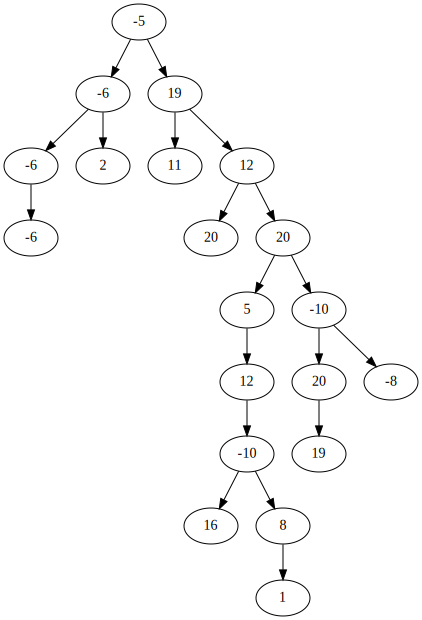

In [30]:
@dataclass
class randomIntNode():
    from random import randint
    rand : int = randint(-10,10)
    val  : int = randint(-10,10)

    def __repr__(self) -> str:
        return str(self.val)
    
    def __lt__(self, y : Any):
        if not isinstance(y,randomIntNode):
            return False 
        
        return self.rand < y.rand
    
    def __eq__(self, y : Any):
        if not isinstance(y,randomIntNode):
            return False 
        
        return self.rand == y.rand
    
    def __gt__(self, y : Any):
        if not isinstance(y,randomIntNode):
            return False 
        
        return self.rand > y.rand
    
    def __le__(self, y : Any):
        if not isinstance(y,randomIntNode):
            return False 
        
        return self.rand <= y.rand
    
    def __ge__(self, y : Any):
        if not isinstance(y,randomIntNode):
            return False 
        
        return self.rand >= y.rand

def genRandTree(size : int = 10) -> BinTree[randomIntNode]:
    from random import randint
    tree : BinTree[randomIntNode] = BinTree()
    for _ in range(size):
        node = randomIntNode()
        node.rand = randint(-size//2,size)
        node.val  = randint(-size//2,size)
        tree.insert(node)
    return tree

tree : BinTree[randomIntNode] = genRandTree(size = 20)
tree.toPic(False)
